## Image classification using Food-101 dataset

### Task description
1. Grab the dataset from https://huggingface.co/datasets/food101
2. Implement a convolutional neural network for multiclass image classification.
3. Use https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html or `dl_lab5` for inspiration.

In [14]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from datasets import load_dataset

In [15]:
dataset = load_dataset("food101")

In [16]:
train_ds = dataset['train']
val_ds = dataset['validation']

In [17]:
train_ds[1]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 'label': 6}

<function matplotlib.pyplot.show(close=None, block=None)>

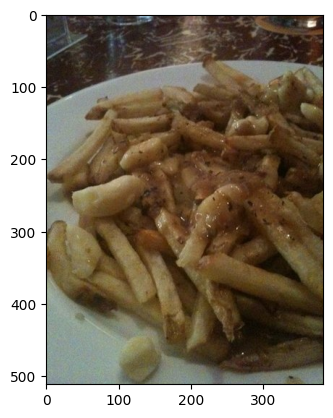

In [18]:
plt.imshow(train_ds[70000]['image'])
plt.show

In [19]:
class FoodDataset(Dataset):
    def __init__(self, ds, transform=None):
        self.ds = ds
        self.transform = transform

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        sample = self.ds[idx]
        image = sample['image']
        label = sample['label']

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

train_ds = FoodDataset(train_ds, transform=transform)

In [20]:
batch_size = 64

size = len(train_ds)
half_size = size // 2
train_ds_half, _ = random_split(train_ds, [half_size, size - half_size])
train_data_loader = DataLoader(train_ds_half, batch_size=batch_size, shuffle=True)
train_data_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_data_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 1024)
        self.fc2 = nn.Linear(1024, 101) 
        self.pool = nn.MaxPool2d(2, 2)
        self.norm1 = nn.BatchNorm2d(32)
        self.norm2 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(self.norm1(torch.relu(self.conv1(x))))
        x = self.pool(self.norm2(torch.relu(self.conv2(x))))
        x = x.view(-1, 64 * 56 * 56)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
device = torch.device("cuda")

model = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(20):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_data_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_data_loader)}")

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 1, Loss: 5.0700287416174605
Epoch 2, Loss: 4.6169252282864335
Epoch 3, Loss: 4.620953700429684
Epoch 4, Loss: 4.616561337500005
Epoch 5, Loss: 4.617893049845824
Epoch 6, Loss: 4.615837433450931
Epoch 7, Loss: 4.617393133205336
Epoch 8, Loss: 4.615600769181509
Epoch 9, Loss: 4.61652680466304
Epoch 10, Loss: 4.615655558737549
Epoch 11, Loss: 4.615674770361668
Epoch 12, Loss: 4.615936079540768
Epoch 13, Loss: 4.615718218925837
Epoch 14, Loss: 4.616040539097142
Epoch 15, Loss: 4.616387158229545
Epoch 16, Loss: 4.615711786054276
Epoch 17, Loss: 4.615678007940988
Epoch 18, Loss: 4.61565158415485
Epoch 19, Loss: 4.615658853505109
Epoch 20, Loss: 4.615659482575752
